In [10]:
! pip install newsapi-python
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='514d413ea7ae4bb69e4b019606e15882')
all_articles = newsapi.get_everything(q='',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-12-01',
                                      to='2022-12-02',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)
all_articles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{'status': 'ok',
 'totalResults': 639,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': None,
   'title': 'Larne beat Glenavon to move five points clear',
   'description': 'Larne edge Glenavon 1-0 at Mourneview Park to move five points clear at the top of the Irish Premiership table.',
   'url': 'https://www.bbc.co.uk/sport/football/63839788',
   'urlToImage': 'https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/002F/production/_127874000_dannywallace.jpg',
   'publishedAt': '2022-12-02T21:49:11Z',
   'content': 'Watch: Ward own goal gives Larne gritty win over Glenavon\r\nA Sean Ward own goal 10 minutes from time saw Larne edge past Glenavon 1-0 and move five points clear the top of the Irish Premiership table… [+1102 chars]'},
  {'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': None,
   'title': 'URC: Edinburgh v Munster - radio & text',
   'description': "Follow live text and radio coverage of Edinburgh's United Rugby Championship m

In [13]:
all_articles['articles'][0]

{'source': {'id': 'bbc-news', 'name': 'BBC News'},
 'author': None,
 'title': 'Larne beat Glenavon to move five points clear',
 'description': 'Larne edge Glenavon 1-0 at Mourneview Park to move five points clear at the top of the Irish Premiership table.',
 'url': 'https://www.bbc.co.uk/sport/football/63839788',
 'urlToImage': 'https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/002F/production/_127874000_dannywallace.jpg',
 'publishedAt': '2022-12-02T21:49:11Z',
 'content': 'Watch: Ward own goal gives Larne gritty win over Glenavon\r\nA Sean Ward own goal 10 minutes from time saw Larne edge past Glenavon 1-0 and move five points clear the top of the Irish Premiership table… [+1102 chars]'}

In [22]:
for i in range(all_articles['totalResults']):
  title= all_articles['articles'][i]['title']
  news = all_articles['articles'][i]['description']
  print(title+'\n'+news+'\n'+'\n')

Larne beat Glenavon to move five points clear
Larne edge Glenavon 1-0 at Mourneview Park to move five points clear at the top of the Irish Premiership table.


URC: Edinburgh v Munster - radio & text
Follow live text and radio coverage of Edinburgh's United Rugby Championship meeting with Munster.


The surprising World Cup group stage XI picked by you
We asked you to rank the players in every World Cup group stage game, here is your best XI and the standout individual performers.


Addo steps down as Ghana boss after elimination
Otto Addo resigns as Ghana boss following their World Cup group-stage elimination.


Ospreys beaten as Sharks bounce back with victory
Ospreys' hopes of a first United Rugby Championship win in South Africa are thwarted as Sharks responded to their historic home defeat by Cardiff with victory in Durban.


No more airplane mode? EU to allow calls on flights
EU airlines will be able to install equipment that lets them provide 5G on board planes by June 2023.


E

IndexError: ignored

In [31]:
import pandas as pd

df = pd.DataFrame(all_articles['articles'])
df.drop(['source', 'author', 'url', 'urlToImage', 'publishedAt', 'content'], axis=1)
df.head()

,title,description
0,Larne beat Glenavon to move five points clear,Larne edge Glenavon 1-0 at Mourneview Park to ...
1,URC: Edinburgh v Munster - radio & text,Follow live text and radio coverage of Edinbur...
2,The surprising World Cup group stage XI picked...,We asked you to rank the players in every Worl...
3,Addo steps down as Ghana boss after elimination,Otto Addo resigns as Ghana boss following thei...
4,Ospreys beaten as Sharks bounce back with victory,Ospreys' hopes of a first United Rugby Champio...


In [38]:
#address = ['Delhi', 'Bangalore', 'Chennai', 'Patna']
  
# Using 'Address' as the column name
# and equating it to the list
#df['Address'] = address

label= [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
df['label']=label
df.head()
#print(df['label'].sum())

,title,description,label
0,Larne beat Glenavon to move five points clear,Larne edge Glenavon 1-0 at Mourneview Park to ...,0
1,URC: Edinburgh v Munster - radio & text,Follow live text and radio coverage of Edinbur...,1
2,The surprising World Cup group stage XI picked...,We asked you to rank the players in every Worl...,1
3,Addo steps down as Ghana boss after elimination,Otto Addo resigns as Ghana boss following thei...,0
4,Ospreys beaten as Sharks bounce back with victory,Ospreys' hopes of a first United Rugby Champio...,0


In [45]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))


from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)


combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#!pip install contractions
import contractions


In [46]:
df['description'][63].split()

['Follow',
 'updates',
 'from',
 'the',
 'three',
 "Women's",
 'Super',
 'League',
 'games,',
 'starting',
 'with',
 'Man',
 "Utd's",
 'game',
 'against',
 'Aston',
 'Villa',
 'at',
 'Old',
 'Trafford.']

In [52]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')
new_sent = ''
for token in df['description'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

"follow update from the three women's super league games, starting with man utd's game against aston villa at old trafford. "

In [54]:
def news_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
  
    new_text = contractions.fix(new_text)    
       
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [55]:
cleaned_news = []  # list of cleaned tweets
for ele in df['description']:
    cleaned_news.append(news_cleaner_without_stopwords(ele))

In [56]:
cleaned_news[:5]

['larne edge glenavon 1-0 at mourneview park to move five point clear at the top of the irish premiership table. ',
 'follow live text and radio coverage of edinburgh is united rugby championship meeting with munster. ',
 'we asked you to rank the player in every world cup group stage game, here is your best xi and the standout individual performers. ',
 'otto addo resigns a ghana bos following their world cup group-stage elimination. ',
 "ospreys' hope of a first united rugby championship win in south africa are thwarted a shark responded to their historic home defeat by cardiff with victory in durban. "]

In [58]:
df['cleaned_news_w/o_SW'] = cleaned_news
df.head()

,title,description,label,cleaned_news_w/o_SW
0,Larne beat Glenavon to move five points clear,Larne edge Glenavon 1-0 at Mourneview Park to ...,0,larne edge glenavon 1-0 at mourneview park to ...
1,URC: Edinburgh v Munster - radio & text,Follow live text and radio coverage of Edinbur...,1,follow live text and radio coverage of edinbur...
2,The surprising World Cup group stage XI picked...,We asked you to rank the players in every Worl...,1,we asked you to rank the player in every world...
3,Addo steps down as Ghana boss after elimination,Otto Addo resigns as Ghana boss following thei...,0,otto addo resigns a ghana bos following their ...
4,Ospreys beaten as Sharks bounce back with victory,Ospreys' hopes of a first United Rugby Champio...,0,ospreys' hope of a first united rugby champion...


In [60]:
all_words = []
for t in df['description']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['Larne', 'edge', 'Glenavon', '1-0', 'at', 'Mourneview', 'Park', 'to', 'move', 'five', 'points', 'clear', 'at', 'the', 'top', 'of', 'the', 'Irish', 'Premiership', 'table.', 'Follow', 'live', 'text', 'and', 'radio', 'coverage', 'of', "Edinburgh's", 'United', 'Rugby', 'Championship', 'meeting', 'with', 'Munster.', 'We', 'asked', 'you', 'to', 'rank', 'the', 'players', 'in', 'every', 'World', 'Cup', 'group', 'stage', 'game,', 'here', 'is']


1009

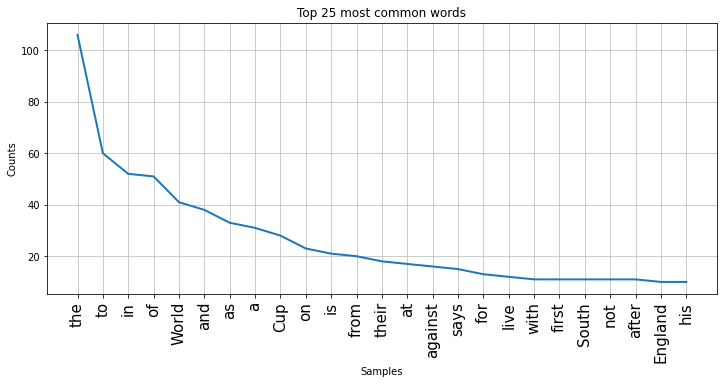

In [61]:
import matplotlib.pyplot as plt

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [63]:
all_words = []
for t in df['cleaned_news_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

len(set(all_words)) # this is the number of unique words in the list

['larne', 'edge', 'glenavon', '1-0', 'at', 'mourneview', 'park', 'to', 'move', 'five', 'point', 'clear', 'at', 'the', 'top', 'of', 'the', 'irish', 'premiership', 'table.', 'follow', 'live', 'text', 'and', 'radio', 'coverage', 'of', 'edinburgh', 'is', 'united', 'rugby', 'championship', 'meeting', 'with', 'munster.', 'we', 'asked', 'you', 'to', 'rank', 'the', 'player', 'in', 'every', 'world', 'cup', 'group', 'stage', 'game,', 'here']


933

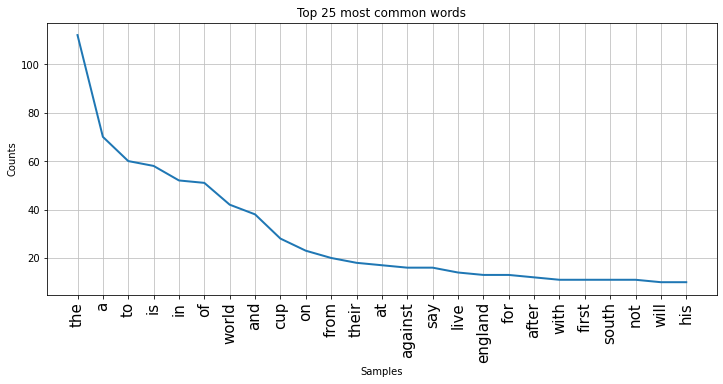

In [64]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [66]:

def news_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
  
    new_text = contractions.fix(new_text)    
      
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [67]:
cleaned_news = list(df['description'].apply(news_cleaner_with_stopwords))
print(cleaned_news[:10])

['larne edge glenavon 1-0 mourneview park point clear irish premiership table. ', 'follow live text radio coverage edinburgh united rugby championship meeting munster. ', 'asked rank player world cup group stage game, best standout individual performers. ', 'otto addo resigns ghana bos following world cup group-stage elimination. ', "ospreys' hope united rugby championship win south africa thwarted shark responded historic home defeat cardiff victory durban. ", 'airline able install equipment let provide board plane june 2023. ', 'world’s richest man’s company involved trial isolated area connected internet. ', 'germany face costa rica thursday knowing progress world cup second round hands. ', 'batter crash hundred england pile run scintillating day test pakistan rawalpindi. ', 'tour france finish outside paris time 121-year history 2024 edition concludes nice. ']


In [69]:
df['cleaned_news_with_SW'] = cleaned_news
df.head()

,title,description,label,cleaned_news_w/o_SW,cleaned_news_with_SW
0,Larne beat Glenavon to move five points clear,Larne edge Glenavon 1-0 at Mourneview Park to ...,0,larne edge glenavon 1-0 at mourneview park to ...,larne edge glenavon 1-0 mourneview park point ...
1,URC: Edinburgh v Munster - radio & text,Follow live text and radio coverage of Edinbur...,1,follow live text and radio coverage of edinbur...,follow live text radio coverage edinburgh unit...
2,The surprising World Cup group stage XI picked...,We asked you to rank the players in every Worl...,1,we asked you to rank the player in every world...,"asked rank player world cup group stage game, ..."
3,Addo steps down as Ghana boss after elimination,Otto Addo resigns as Ghana boss following thei...,0,otto addo resigns a ghana bos following their ...,otto addo resigns ghana bos following world cu...
4,Ospreys beaten as Sharks bounce back with victory,Ospreys' hopes of a first United Rugby Champio...,0,ospreys' hope of a first united rugby champion...,ospreys' hope united rugby championship win so...


['larne', 'edge', 'glenavon', '1-0', 'mourneview', 'park', 'point', 'clear', 'irish', 'premiership', 'table.', 'follow', 'live', 'text', 'radio', 'coverage', 'edinburgh', 'united', 'rugby', 'championship', 'meeting', 'munster.', 'asked', 'rank', 'player', 'world', 'cup', 'group', 'stage', 'game,', 'best', 'standout', 'individual', 'performers.', 'otto', 'addo', 'resigns', 'ghana', 'bos', 'following', 'world', 'cup', 'group-stage', 'elimination.', "ospreys'", 'hope', 'united', 'rugby', 'championship', 'win']


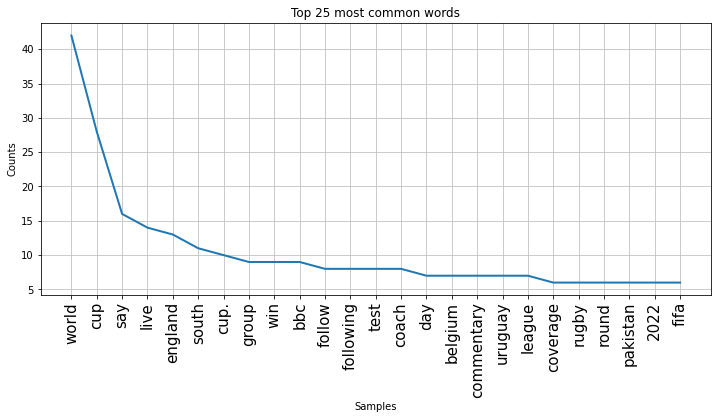

794

In [71]:
all_words = []
for t in df['cleaned_news_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

len(set(all_words))

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(df['cleaned_news_w/o_SW'])

In [74]:
CV_features.shape

(100, 881)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, df['label'], test_size=0.25, stratify=df['label'], random_state=1000)

In [95]:
from sklearn.linear_model import LogisticRegression
#LR = LogisticRegression(solver='liblinear')
#LR.fit(X_train, y_train)

#print(LR.score(X_train, y_train))  # train score)
#print(LR.score(X_test, y_test))   # test score)  

In [94]:
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.92)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)

0.8133333333333334
0.8
